In [354]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
from tqdm import *
from plot import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MC

First initialize the plotting module and check for any missing files.

In [365]:
plot_mc = LimitPlot(data_dir='/tigress/bsafdi/github/NPTF-working//NPTF-ID-Catalog/SimpleScan/data/FloatPS_together_floatDM',
                    elephant=True, 
                    nmc=95, 
                    halos_ran=100, 
                    halos_to_keep=100,
                    data_type="mc",
                    elephantm = [0,11,52])

In [215]:
plot_mc = LimitPlot(data_dir='/tigress/bsafdi/github/NPTF-working//NPTF-ID-Catalog/SimpleScan/data/FloatPS_together_noDM_Asimov/////',
                    elephant=True, 
                    nmc=1, 
                    halos_ran=100, 
                    halos_to_keep=100,
                    data_type="Asimov",
                    elephantm = [0,11,52])

In [366]:
imc_missing, iobj_missing = plot_mc.files_exist()


0 files missing!


Run to get the limits.

In [368]:
mc_ary = plot_mc.return_limits()

## Elephants

Plot some elephants.

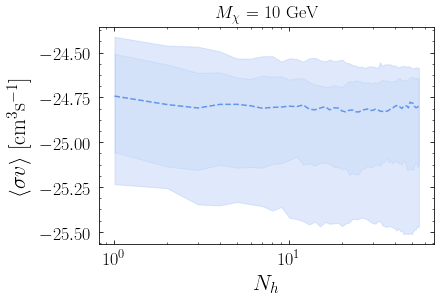

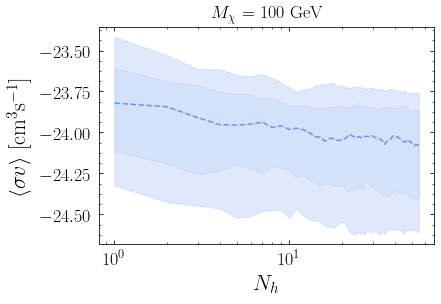

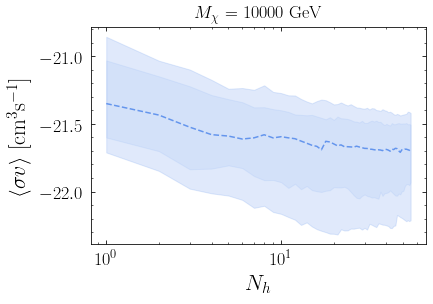

In [370]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[50],axis=1)[0], color='cornflowerblue', ls='--')

    plt.fill_between(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[16],axis=1)[0],np.percentile(mc_ary[0][:,midx,:],[84],axis=1)[0], alpha=0.1, color='cornflowerblue')
    plt.fill_between(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[2.5],axis=1)[0],np.percentile(mc_ary[0][:,midx,:],[97.5],axis=1)[0], alpha=0.2, color='cornflowerblue')

    plt.title("$M_\chi$ = " + str(int(plot_mc.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$")
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
    plt.xscale("log")
    plt.show()

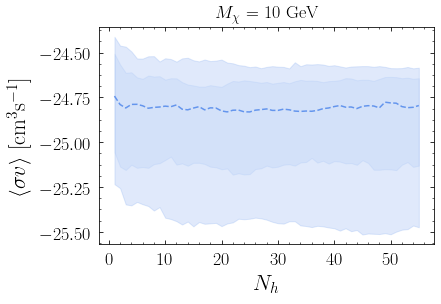

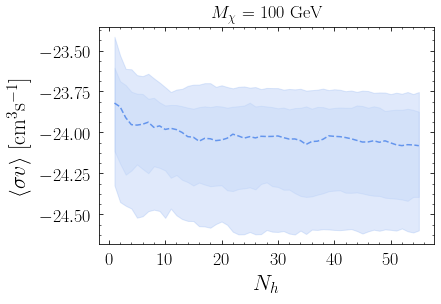

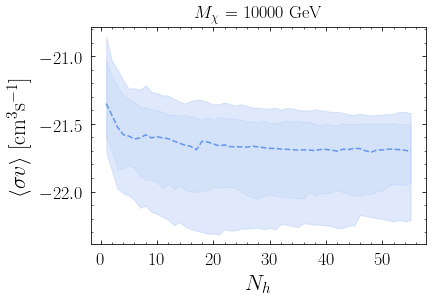

In [371]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[50],axis=1)[0], color='cornflowerblue', ls='--')

    plt.fill_between(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[16],axis=1)[0],np.percentile(mc_ary[0][:,midx,:],[84],axis=1)[0], alpha=0.1, color='cornflowerblue')
    plt.fill_between(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[2.5],axis=1)[0],np.percentile(mc_ary[0][:,midx,:],[97.5],axis=1)[0], alpha=0.2, color='cornflowerblue')

    plt.title("$M_\chi$ = " + str(int(plot_mc.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$")
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
    plt.show()

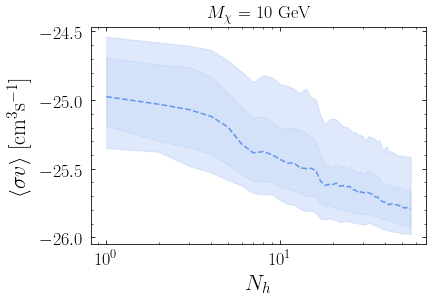

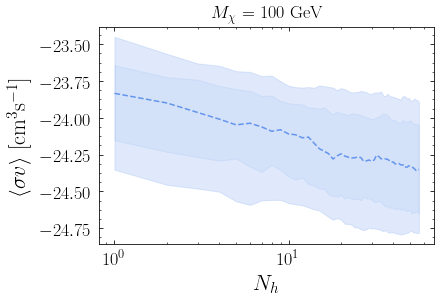

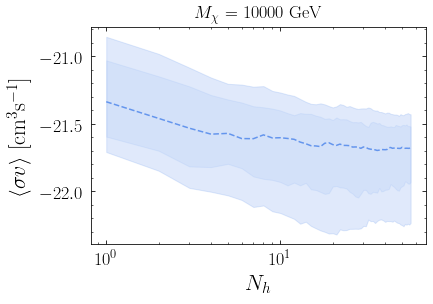

In [212]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[50],axis=1)[0], color='cornflowerblue', ls='--')

    plt.fill_between(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[16],axis=1)[0],np.percentile(mc_ary[0][:,midx,:],[84],axis=1)[0], alpha=0.1, color='cornflowerblue')
    plt.fill_between(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[2.5],axis=1)[0],np.percentile(mc_ary[0][:,midx,:],[97.5],axis=1)[0], alpha=0.2, color='cornflowerblue')

    plt.title("$M_\chi$ = " + str(int(plot_mc.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$")
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
    
    plt.xscale("log")
    plt.show()

In [ ]:
plot_Asimov = LimitPlot(data_dir='/tigress/bsafdi/github/NPTF-working//NPTF-ID-Catalog/SimpleScan/data/FloatPS_indiv_floatDM_Tully_Asimov/',
                    elephant=False, 
                    nmc=1, 
                    halos_ran=1000, 
                    halos_to_keep=1000,
                    data_type="Asimov",
                      nonoverlap=True,
                      nonoverlapradius=5,
                     bcut=20)
Asimov_ary, _ = plot_Asimov.return_limits()

# Data

In [394]:
plot_data = LimitPlot(data_dir='/tigress/bsafdi/github/NPTF-working//NPTF-ID-Catalog/SimpleScan/data/Tully',
                    elephant=False, 
                    nmc=1, 
                    halos_ran=1000, 
                    halos_to_keep=1000,
                    data_type="data",
                      nonoverlap=True,
                      nonoverlapradius=5,
                     bcut=20)
data_ary, _ = plot_data.return_limits()

In [396]:
len(data_ary)

225

## Limit

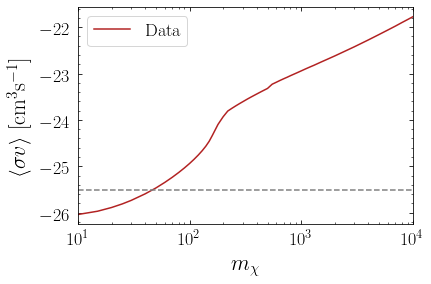

In [397]:
plt.plot(plot_data.marr,data_ary[-1,:,0], color='firebrick', label="Data")
# plt.plot(plot_data.marr,Asimov_ary[-1,:,0], color='green', label="Asimov")


plt.axhline(np.log10(3e-26), ls = '--', color='grey')
plt.xscale("log")
plt.xlim(10,10000)
plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
plt.xlabel("$m_\chi$")

plt.legend()

## Elephants

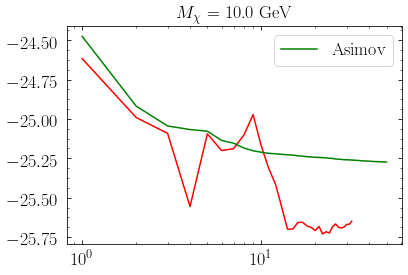

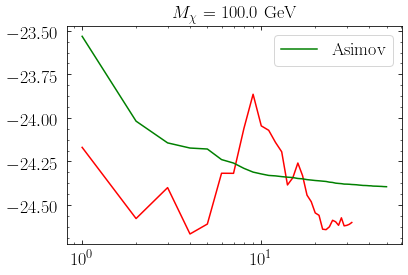

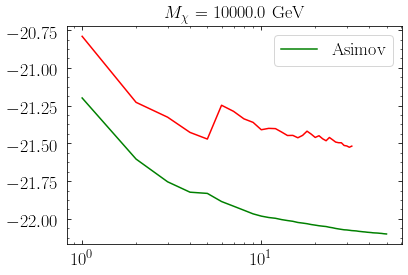

In [393]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='red')
    plt.plot(np.arange(len(Asimov_ary[:,midx,:])) + 1,np.percentile(Asimov_ary[:,midx,:],[50],axis=1)[0], color='green', label="Asimov")


    plt.title("$M_\chi$ = " + str(plot_data.marr[midx]) + " GeV")
    plt.legend()
    plt.xscale("log")
    plt.show()

# Injected signal

In [183]:
nmc = 20

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([3,5,7,9,11])):
    plot_mc = LimitPlot(data_dir='/tigress/bsafdi/github/NPTF-working//NPTF-ID-Catalog/SimpleScan/data/FloatPS_indiv_floatDM_dm' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=300, 
                        halos_to_keep=300,
                        data_type="mc",
                        elephantm = [11])
    limit_ary_temp, xsec_max_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,11,:]
    limit_ary[idm] = limit_ary_temp[-1,11,:]

In [185]:
plot_mc = LimitPlot(data_dir='/tigress/bsafdi/github/NPTF-working//NPTF-ID-Catalog/SimpleScan/data/FloatPS_indiv_floatDM/',
                    elephant=True, 
                    nmc=18, 
                    halos_ran=300, 
                    halos_to_keep=300,
                    data_type="mc",
                    elephantm = [11])

limit_ary_nodm, _ = plot_mc.return_limits()

In [186]:
xsec_max = np.log10(np.percentile(xsec_max_ary, [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary, [16,50,84], axis=1))

In [187]:
limit_nodm = np.log10(np.percentile(10**limit_ary_nodm[-1,11,:], [16,50,84], axis=0))

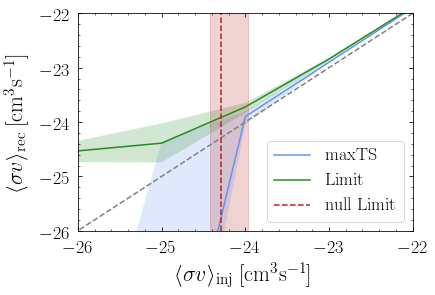

In [190]:
plt.plot(np.arange(-22,-27,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-22,-27,-1),  xsec_max[0], xsec_max[2], alpha=0.2)

plt.plot(np.arange(-22,-27,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-22,-27,-1),  lims[0], lims[2], alpha=0.2)

plt.plot([-27,-21],[-27,-21],ls='--', color='grey')

plt.axvspan(limit_nodm[0],limit_nodm[2],color='firebrick',alpha=0.2)
plt.axvline(limit_nodm[1],color='firebrick',alpha=1,ls='--', label="null Limit")


plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")

plt.ylim(-26,-22)
plt.xlim(-26,-22)


plt.legend()

In [341]:
np.load("../data/FloatPS_indiv_noDM_debug_TS0/LL_inten_o0_mc0.npz")['LL']

array([[ -5.43867194e+03,  -5.43867194e+03,  -5.43867194e+03, ...,
         -6.19606049e+05,  -7.22416260e+05,  -8.41535277e+05],
       [ -5.31194638e+03,  -5.31194638e+03,  -5.31194638e+03, ...,
         -6.50942639e+05,  -7.56490841e+05,  -8.78525896e+05],
       [ -5.25074187e+03,  -5.25074187e+03,  -5.25074187e+03, ...,
         -6.75252813e+05,  -7.82762485e+05,  -9.06877851e+05],
       ..., 
       [ -3.13734470e+02,  -3.13734470e+02,  -3.13734470e+02, ...,
         -7.57824485e+05,  -8.70658318e+05,  -1.00029890e+06],
       [ -1.94601004e+02,  -1.94601004e+02,  -1.94601005e+02, ...,
         -7.57719627e+05,  -8.70553737e+05,  -1.00019460e+06],
       [ -1.62947427e+02,  -1.62947427e+02,  -1.62947427e+02, ...,
         -7.57687973e+05,  -8.70522084e+05,  -1.00016295e+06]])

1it [00:00, 47.13it/s]

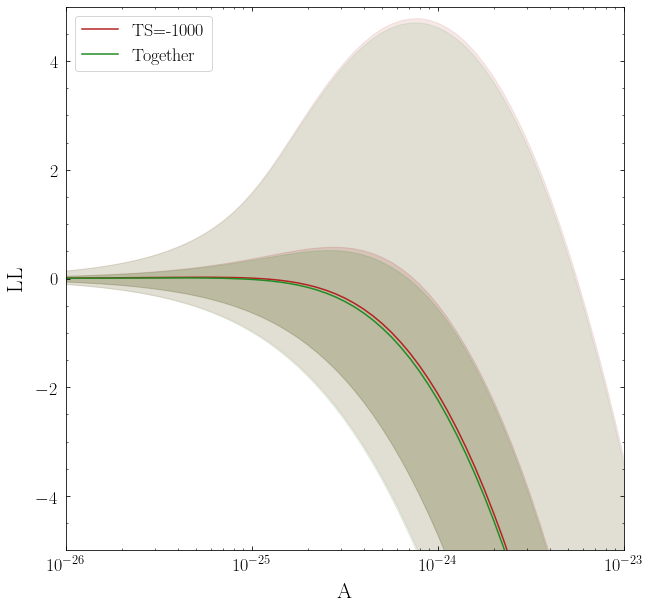

In [337]:
nobj=1
nmc = 30
xsecs = np.logspace(-33,-18,301)

LL2 = np.zeros((nobj,nmc,len(xsecs)))
LL2_indiv = np.zeros((nobj,nmc,len(xsecs)))
LL2_DM = np.zeros((nobj,nmc,len(xsecs)))


im = 11

for iobj in tqdm_notebook(range(nobj)):
    # Cumulative 
    for imc in (range(nmc)):
        LL2[iobj,imc] = LL2[iobj-1,imc]  + np.load("../data/FloatPS_indiv_noDM_debug_TS0/////LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][im]
        LL2[iobj,imc] -= LL2[iobj,imc,0]
        LL2_indiv[iobj,imc] = LL2_indiv[iobj-1,imc]  + np.load("../data/FloatPS_together_noDM_debug///////LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][im]
        LL2_indiv[iobj,imc] -= LL2_indiv[iobj,imc,0]
#         LL2_DM[iobj,imc] = LL2_DM[iobj-1,imc]  + np.load("../data/FloatPS_indiv_floatDM//LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][0]
#         LL2_DM[iobj,imc] -= LL2_DM[iobj,imc,0]


ncols=1
nrows=1

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/3.,30/3.))

for i, row in tqdm(enumerate([axes2d])):
    for j, cell in enumerate([row]):
        iobj = i*ncols + j
        cell.fill_between(xsecs,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2[iobj],50,axis=0),color='firebrick',label='TS=-1000')

        cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],2.5,axis=0),np.percentile(LL2_indiv[iobj],97.5,axis=0),color='forestgreen',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],16,axis=0),np.percentile(LL2_indiv[iobj],84,axis=0),color='forestgreen',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2_indiv[iobj],50,axis=0),color='forestgreen',label='Together')

#         cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],2.5,axis=0),np.percentile(LL2_DM[iobj],97.5,axis=0),color='cornflowerblue',alpha=0.1)
#         cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],16,axis=0),np.percentile(LL2_DM[iobj],84,axis=0),color='cornflowerblue',alpha=0.15)
#         cell.plot(xsecs,np.percentile(LL2_DM[iobj],50,axis=0),color='cornflowerblue',label='Indiv DM')

        cell.legend(loc='upper left')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.legend(loc='upper left')
        cell.set_xlim(1e-26,1e-23)
        cell.set_ylim(-5,5)
# fig.savefig("Compare.pdf")

5it [00:00,  5.39it/s]


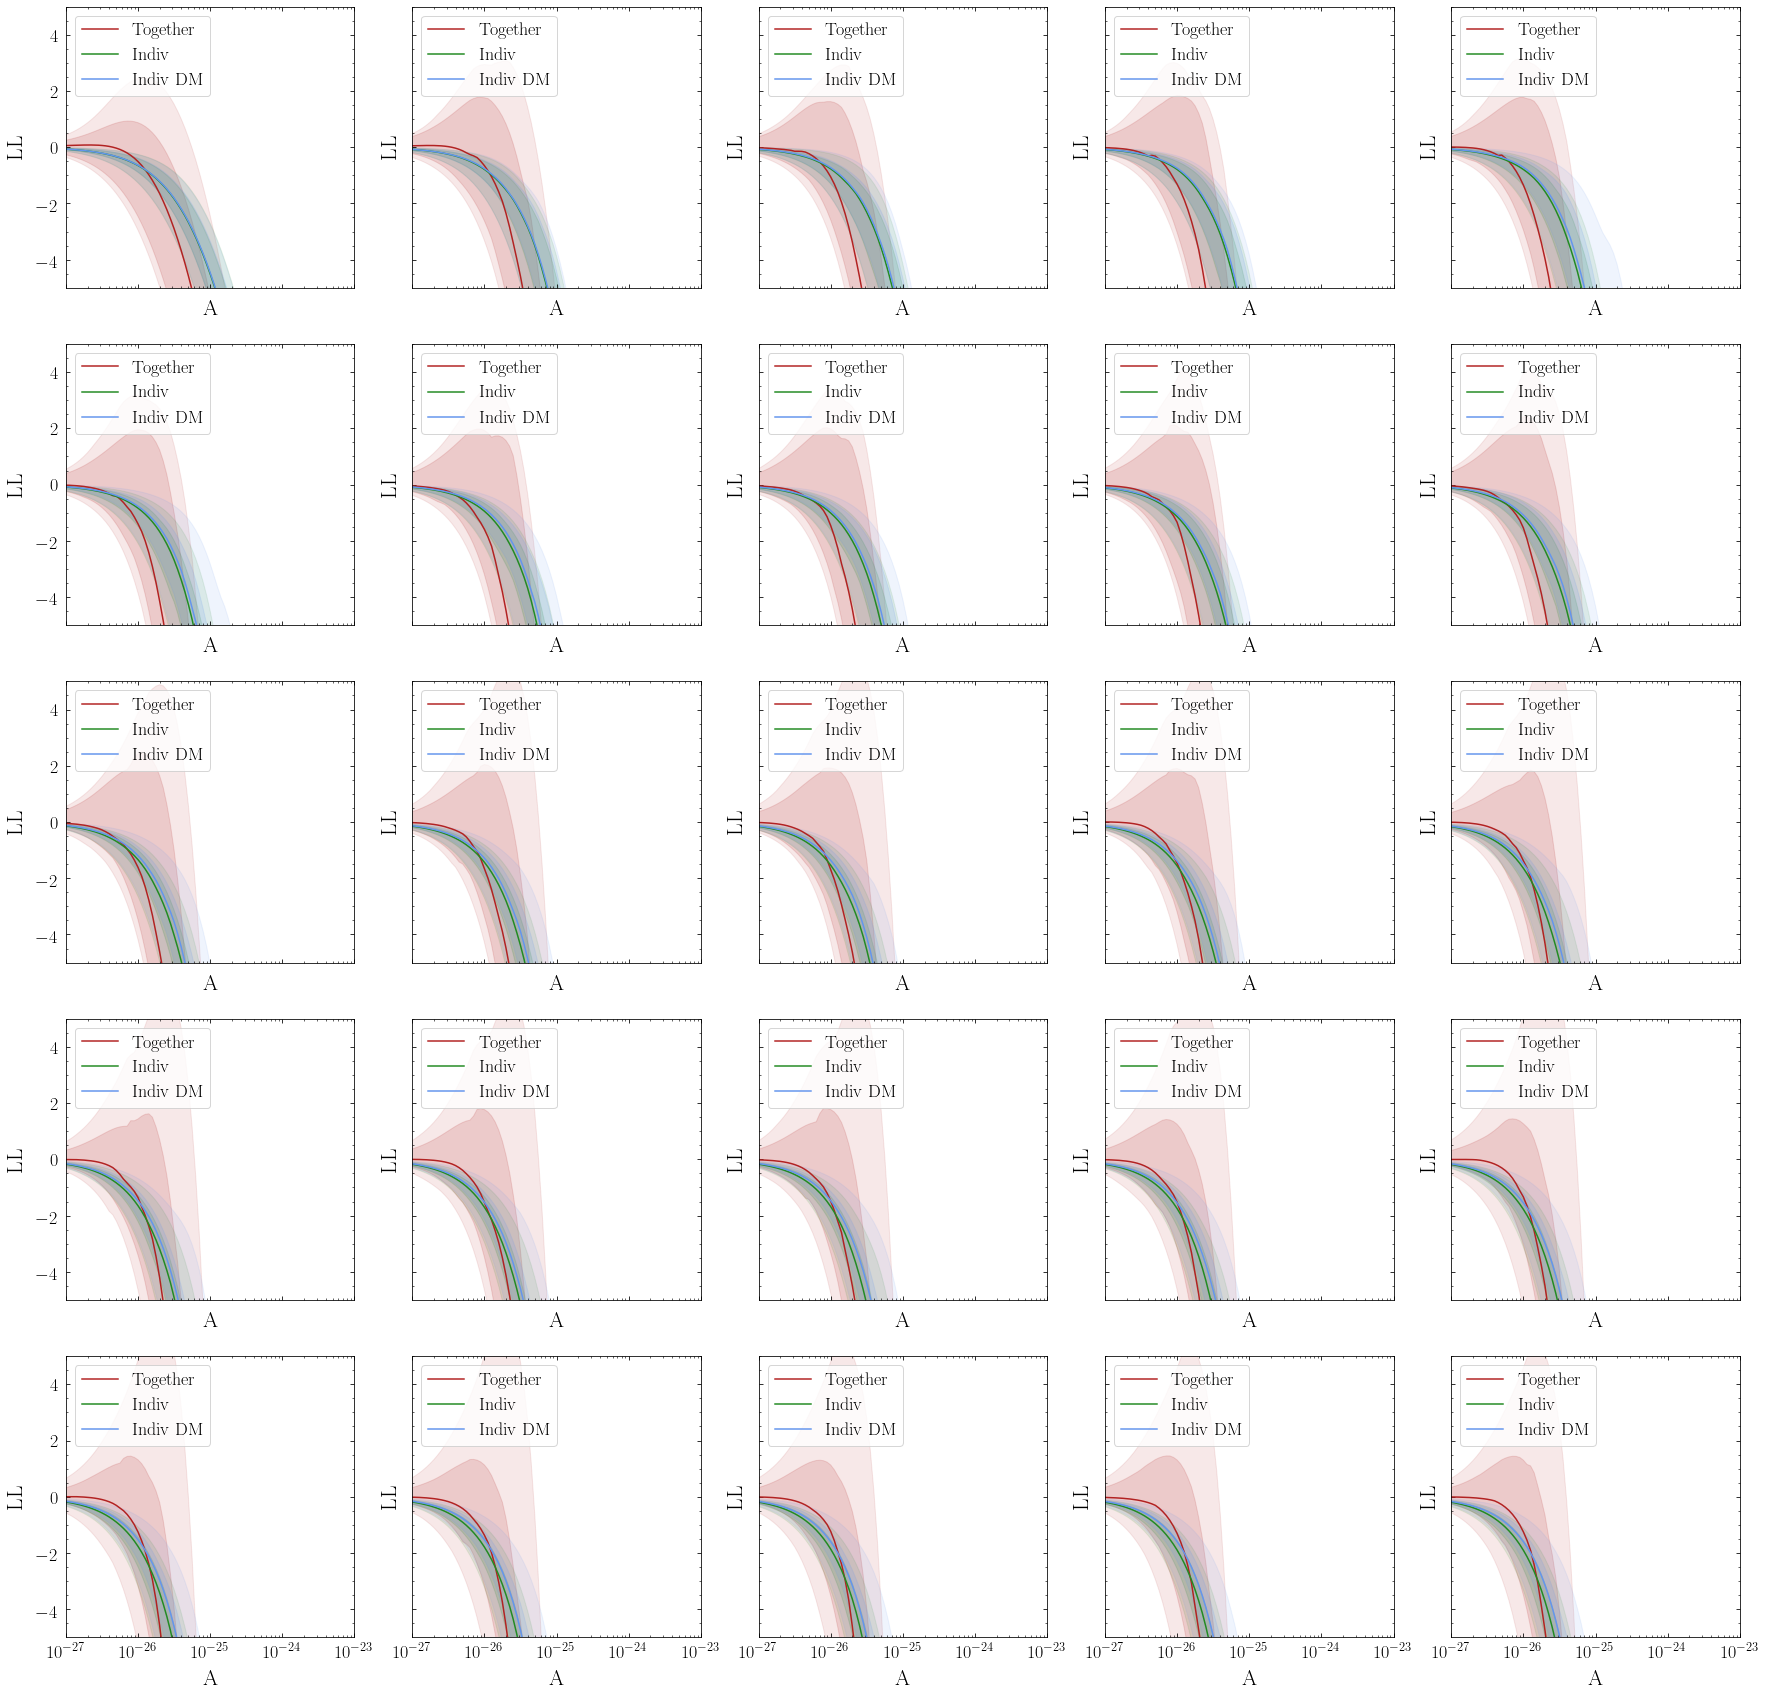

In [237]:
nobj=25
nmc = 50
xsecs = np.logspace(-33,-18,301)

LL2 = np.zeros((nobj,nmc,len(xsecs)))
LL2_indiv = np.zeros((nobj,nmc,len(xsecs)))
LL2_DM = np.zeros((nobj,nmc,len(xsecs)))


for iobj in tqdm_notebook(range(nobj)):
    # Cumulative 
    for imc in (range(nmc)):
        LL2[iobj,imc] = LL2[iobj-1,imc]  + np.load("../data/FloatPS_together_noDM///LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][0]
        LL2[iobj,imc] -= LL2[iobj,imc,0]
        LL2_indiv[iobj,imc] = LL2_indiv[iobj-1,imc]  + np.load("../data/FloatPS_indiv_noDM///LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][0]
        LL2_indiv[iobj,imc] -= LL2_indiv[iobj,imc,0]
        LL2_DM[iobj,imc] = LL2_DM[iobj-1,imc]  + np.load("../data/FloatPS_indiv_floatDM//LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][0]
        LL2_DM[iobj,imc] -= LL2_DM[iobj,imc,0]


ncols=5
nrows=5

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.,30/1.))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i*ncols + j
        cell.fill_between(xsecs,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2[iobj],50,axis=0),color='firebrick',label='Together')

        cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],2.5,axis=0),np.percentile(LL2_indiv[iobj],97.5,axis=0),color='forestgreen',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],16,axis=0),np.percentile(LL2_indiv[iobj],84,axis=0),color='forestgreen',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2_indiv[iobj],50,axis=0),color='forestgreen',label='Indiv')

        cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],2.5,axis=0),np.percentile(LL2_DM[iobj],97.5,axis=0),color='cornflowerblue',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],16,axis=0),np.percentile(LL2_DM[iobj],84,axis=0),color='cornflowerblue',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2_DM[iobj],50,axis=0),color='cornflowerblue',label='Indiv DM')

        cell.legend(loc='upper left')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.legend(loc='upper left')
        cell.set_xlim(1e-27,1e-23)
        cell.set_ylim(-5,5)
# fig.savefig("Compare.pdf")

5it [00:02,  2.37it/s]


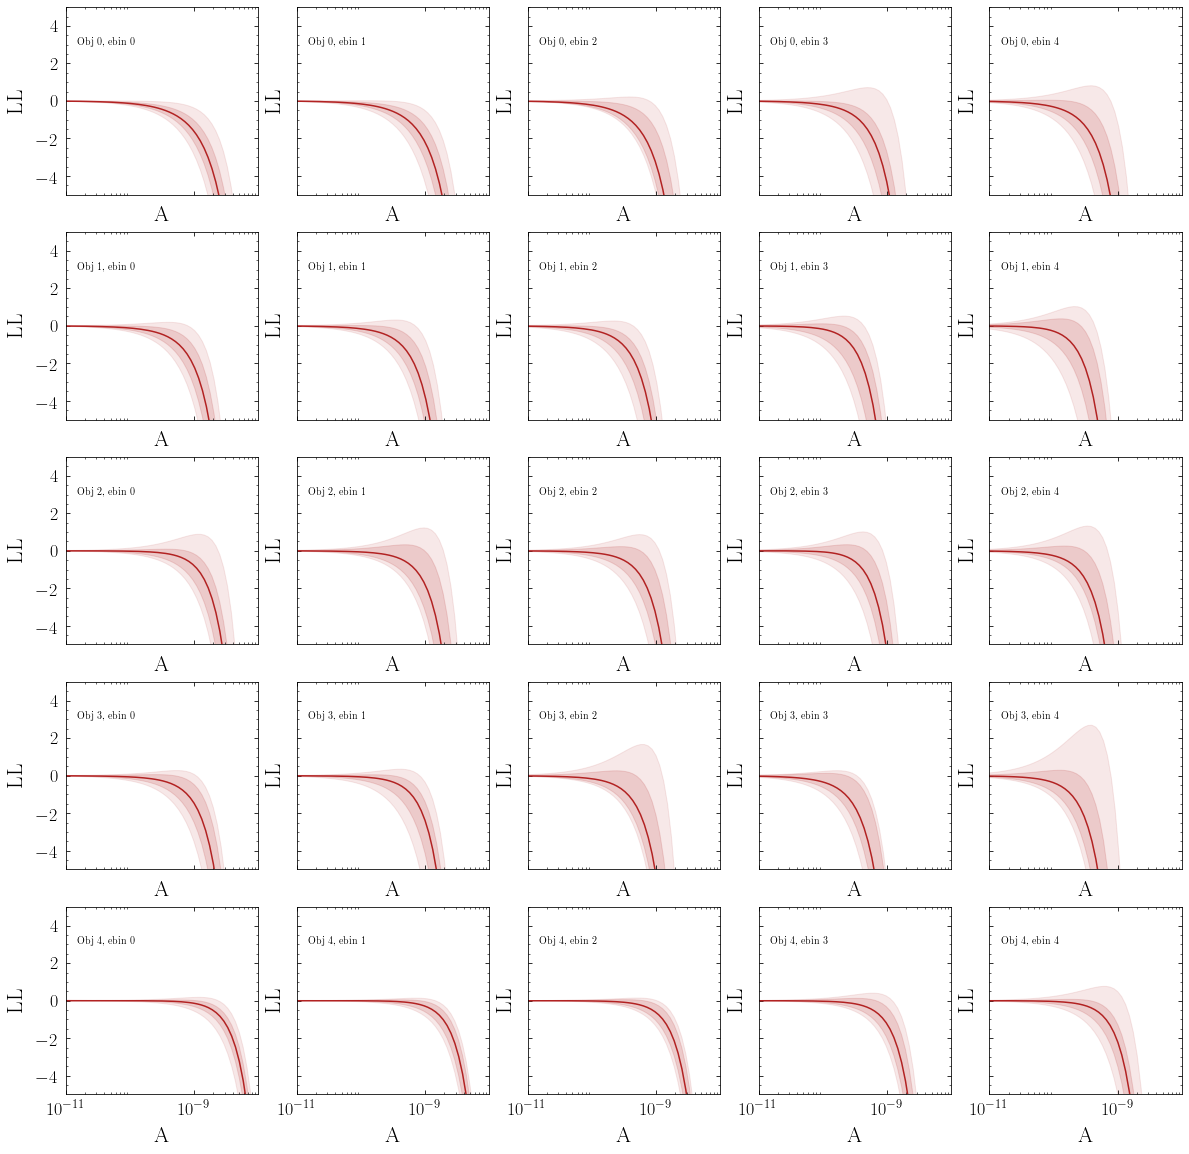

In [240]:
ncols=5
nrows=5
nmc = 50

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.5,30/1.5))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i
        iebin = j
        LL2 = np.zeros((nmc, 200))
        for imc in range(nmc):
            LL2[imc] = np.load("../data/FloatPS_indiv_noDM//LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL'][iebin]
            inten = np.load("../data/FloatPS_indiv_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['intens'][iebin]
            LL2[imc]-= LL2[imc][0]
#         LL2_Asimov = np.load("data/old/Asimov////LL_inten_o"+str(iobj)+"_Asimov.npz")['LL'][iebin]
#         LL2_Asimov -= LL2_Asimov[0]
        
        cell.fill_between(inten,np.percentile(LL2,2.5,axis=0),np.percentile(LL2,97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(inten,np.percentile(LL2,16,axis=0),np.percentile(LL2,84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(inten,np.percentile(LL2,50,axis=0),color='firebrick')
#         cell.plot(inten,LL2_Asimov,color='black',linestyle='--')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.set_xlim(1e-11,1e-8)
        cell.text(1.5e-11,3, "Obj " + str(iobj) + ", ebin " + str(iebin))
        cell.set_ylim(-5,5)

5it [00:06,  1.36s/it]


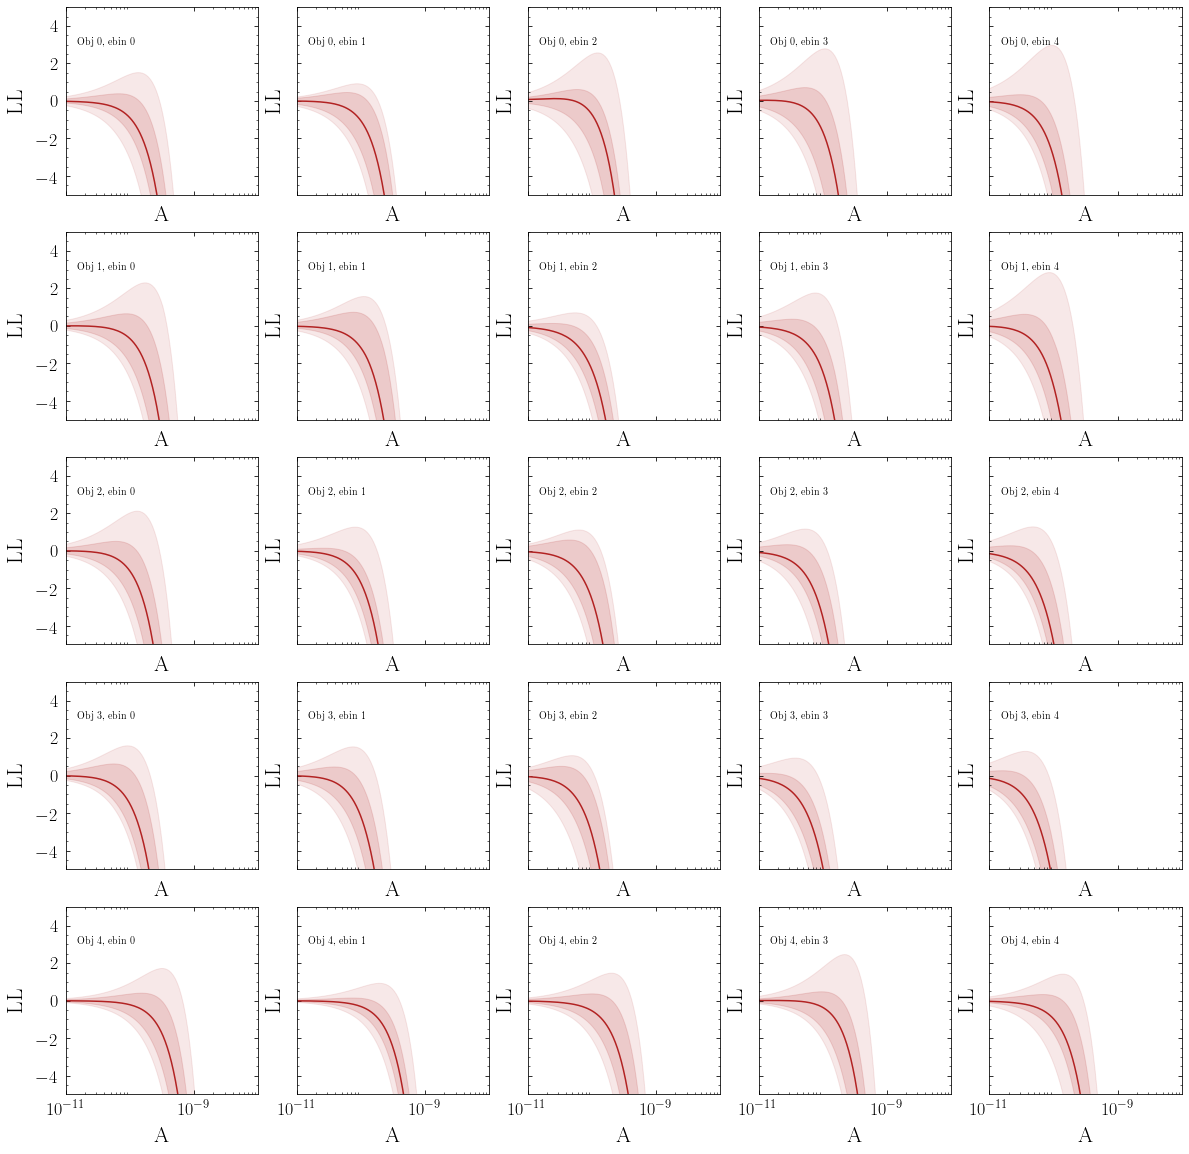

In [242]:
ncols=5
nrows=5
nmc = 50

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.5,30/1.5))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i
        iebin = j
        LL2 = np.zeros((nmc, 500))
        for imc in range(nmc):
            LL2[imc] = np.load("../data/FloatPS_together_noDM//LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL'][iebin]
            inten = np.load("../data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['intens'][iebin]
            LL2[imc]-= LL2[imc][0]
#         LL2_Asimov = np.load("data/old/Asimov////LL_inten_o"+str(iobj)+"_Asimov.npz")['LL'][iebin]
#         LL2_Asimov -= LL2_Asimov[0]
        
        cell.fill_between(inten,np.percentile(LL2,2.5,axis=0),np.percentile(LL2,97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(inten,np.percentile(LL2,16,axis=0),np.percentile(LL2,84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(inten,np.percentile(LL2,50,axis=0),color='firebrick')
#         cell.plot(inten,LL2_Asimov,color='black',linestyle='--')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.set_xlim(1e-11,1e-8)
        cell.text(1.5e-11,3, "Obj " + str(iobj) + ", ebin " + str(iebin))
        cell.set_ylim(-5,5)

In [236]:
len(np.load("../data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(80)+".npz")['LL'][iebin])

200